## TK's simultaneous juxtracellular-imaging recording

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import caiman as cm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("ticks")
%load_ext autoreload
%autoreload 2
%matplotlib inline
fish_path = os.path.abspath(os.path.join('..'))
if fish_path not in sys.path:
    sys.path.append(fish_path)
import peakutils

In [2]:
from keras.layers import RepeatVector, Bidirectional, TimeDistributed
from keras.layers.core import Dropout, Dense
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.models import load_model
from keras.utils import plot_model

Using TensorFlow backend.


In [3]:
def plot_spks(plt, spkcount, ratio, label='Raw spike time'):
    spkTime = spkcount>0
    plt.plot(np.array(np.where(spkTime)).T, spkcount[spkTime]*ratio,'o', label=label)

## Spike vs no-spike Detection on a single cell

Example code from https://gist.github.com/philipperemy/b8a7b7be344e447e7ee6625fe2fdd765

In [4]:
def prepare_sequences(x_train, y_train, window_length):
    full_seq = x_train.flatten()
    target_seq = y_train.flatten()
    windows = []
    outliers = []
    for window_start in range(0, len(full_seq) - window_length + 1):
        window_end = window_start + window_length
        window_range = range(window_start, window_end)
        window = list(full_seq[window_range])
        contain_outlier = target_seq[window_range].sum()>0
        outliers.append(contain_outlier)
        windows.append(window)
    return np.expand_dims(np.array(windows), axis=2), np.array(outliers).astype(np.bool)

In [5]:
# this does not work
def prepare_sequences_center(x_train, y_train, window_length):
    full_seq = x_train.flatten()
    target_seq = y_train.flatten()
    windows = []
    outliers = []
    for window_start in range(0, len(full_seq) - window_length + 1):
        window_end = window_start + window_length
        window_range = range(window_start, window_end)
        window_mid = int(round(np.median(window_range)))
        window = list(full_seq[window_range])
        contain_outlier = target_seq[window_mid]>0
        outliers.append(contain_outlier)
        windows.append(window)
    return np.expand_dims(np.array(windows), axis=2), np.array(outliers).astype(np.bool)

In [6]:
def create_lstm_model(hidden_dim, window_length, m=1):
    model = Sequential()
    model.add(Bidirectional(LSTM(hidden_dim, return_sequences=True), input_shape=(window_length, m)))
    model.add(Dropout(p=0.2))
    model.add(Bidirectional(LSTM(hidden_dim, return_sequences=False)))
    model.add(Dense(1, activation='sigmoid'))    
    model.compile(loss='binary_crossentropy', optimizer='adam')  
    return model

In [ ]:
# dat = np.load('tmpData/TK09282017Fish1-1_ex_spk_voltr.npz')
# spkcount, voltr, devoltr = dat['arr_0'].astype('uint8'), dat['arr_1'], dat['arr_2']

In [ ]:
# window_length = 40
# x1_, contain_outliers_ = prepare_sequences(voltr, spkcount, window_length)
# x2_, _ = prepare_sequences(devoltr, spkcount, window_length)
# # x_ = np.concatenate((x1_, x2_), axis=2) # does not work
# # x_ = x1_ - x2_ # does not work
# x_ = x1_
# # fail = True
# # while fail:
# #     train_test_index = np.random.rand(x_.shape[0])>0.1
# #     if contain_outliers_[~train_test_index].mean()>0.1:
# #         fail = False
# train_test_index = np.random.rand(x_.shape[0])>0.3
        
# x_test = x_[~train_test_index, :, :]
# y_test = contain_outliers_[~train_test_index][:, np.newaxis]

# x_train = x_[train_test_index, :, :]
# y_train = contain_outliers_[train_test_index][:, np.newaxis]

In [ ]:
# hidden_dim = 60
# m = create_lstm_model(hidden_dim, window_length, m=x_.shape[2])
# plot_model(m, 'model.png')
# m.fit(x_train, y_train, batch_size=64, nb_epoch=5, validation_data=(x_test, y_test))

In [ ]:
# pred_x_test = m.predict(x_test)
# sns.distplot(pred_x_test[y_test[:, 0]], label='Spike')
# sns.distplot(pred_x_test[~y_test[:, 0]], label='None-Spike')
# sns.despine()
# # plt.xlim([0, 1])
# plt.xlabel('Predition of spike probability for 40-step data')
# plt.ylabel('Counts')
# plt.legend()
# plt.title('Testing data')
# plt.show()

In [ ]:
# pred_x_test = m.predict(x_)
# sns.distplot(pred_x_test[contain_outliers_], label='Spike')
# sns.distplot(pred_x_test[~contain_outliers_], label='None-Spike')
# sns.despine()
# plt.xlim([0,1])
# plt.xlabel('Predition of spike probability for 40-step data')
# plt.ylabel('Counts')
# plt.legend()
# plt.show()

In [ ]:
# pred_x_test = m.predict(x_)
# spkInWindow = pred_x_test>0.5
# spkInWindow = spkInWindow.flatten()
# spkInWindow[:window_length] = False

In [ ]:
# voltr_ = voltr.copy()
# spkcount_ = np.zeros(spkcount.shape)
# for idx, nspk in enumerate(spkInWindow):
#     if nspk:
#         x__ = voltr_[idx:idx+window_length]
#         x__ = x__[np.newaxis, :, np.newaxis]
#         spk_idx = np.where(x__ == x__.max())[1][0]
#         if spk_idx<window_length-1:
#             spkcount_[idx+spk_idx] = True

In [ ]:
# diff = voltr - devoltr
# diff_ = diff[spkcount_.astype(np.bool)]
# thres = np.percentile(diff_, 20)
# spk_diff = diff > thres
# spkcount__ = np.logical_and(spkcount_, spk_diff)

In [ ]:
# spk = spkcount>0
# plt.figure(figsize=(20, 3))
# plt.plot(spk*voltr.max()*1.5,'o', label='Raw spike time')
# plt.plot(spkcount__*voltr.max()*2.0,'o', label='Detected spike time')
# plt.plot((spk != spkcount__).astype('int')*voltr.max()*2.5,'o', label='Miss matched')
# plt.plot(voltr,'-')
# plt.plot(devoltr,'-')
# plt.xlabel('Frame')
# plt.xlim([0, 1000])
# plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
# sns.despine()
# plt.show()

## Training with all simultaneous recording data (4 cells)

In [16]:
files = ['tmpData/TK09282017Fish1-1_ex_spk_voltr.npz', 
         'tmpData/TK09212017Fish1-1_ex_spk_voltr.npz', 
         'tmpData/TK10052017Fish2-2_ex_spk_voltr.npz',
         'tmpData/YS_in_spk_voltr.npz']

spkcount_set = np.array([])
voltr_set = np.array([])
devoltr_set = np.array([])

for nfile in files:
    dat = np.load(nfile)
    spkcount, voltr, devoltr = dat['arr_0'].astype('uint8'), dat['arr_1'], dat['arr_2']
    print(len(spkcount))
    spkcount_set = np.concatenate((spkcount_set, spkcount))
    voltr_set = np.concatenate((voltr_set, voltr))
    devoltr_set = np.concatenate((devoltr_set, devoltr))

36299
36297
36298
24001


In [8]:
window_length = 40
x1_, contain_outliers_ = prepare_sequences(voltr_set, spkcount_set, window_length)
x2_, _ = prepare_sequences(devoltr_set, spkcount_set, window_length)
x_ = x1_
train_test_index = np.random.rand(x_.shape[0])>0.3
x_test = x_[~train_test_index, :, :]
y_test = contain_outliers_[~train_test_index][:, np.newaxis]
x_train = x_[train_test_index, :, :]
y_train = contain_outliers_[train_test_index][:, np.newaxis]

In [9]:
hidden_dim = 100
m = create_lstm_model(hidden_dim, window_length, m=x_.shape[2])
m.fit(x_train, y_train, batch_size=64, nb_epoch=5, validation_data=(x_test, y_test))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 92990 samples, validate on 39866 samples
Epoch 1/5
92990/92990 [==============================] - 209s 2ms/step - loss: 0.4122 - val_loss: 0.4197
Epoch 2/5
92990/92990 [==============================] - 201s 2ms/step - loss: 0.2792 - val_loss: 0.2374
Epoch 3/5
92990/92990 [==============================] - 202s 2ms/step - loss: 0.2366 - val_loss: 0.2246
Epoch 4/5
92990/92990 [==============================] - 206s 2ms/step - loss: 0.2286 - val_loss: 0.2263
Epoch 5/5
92990/92990 [==============================] - 205s 2ms/step - loss: 0.2257 - val_loss: 0.2242


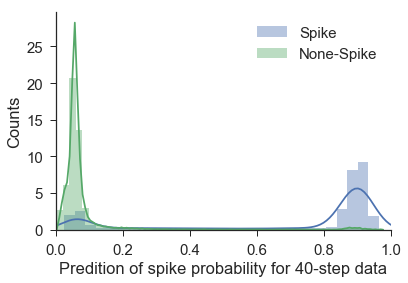

In [13]:
pred_x_test = m.predict(x_test) #x_
contain_outliers__ = contain_outliers_[~train_test_index]
sns.distplot(pred_x_test[contain_outliers__], label='Spike')
sns.distplot(pred_x_test[~contain_outliers__], label='None-Spike')
sns.despine()
plt.xlim([0,1])
plt.xlabel('Predition of spike probability for 40-step data')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [11]:
pred_x_test = m.predict(x_)
spkInWindow = pred_x_test>0.4
spkInWindow = spkInWindow.flatten()
spkInWindow[:window_length] = False

voltr_ = voltr_set.copy()
spkcount_ = np.zeros(spkcount_set.shape)
for idx, nspk in enumerate(spkInWindow):
    if nspk:
        x__ = voltr_[idx:idx+window_length]
        spk_idx = peakutils.indexes(x__, thres=.9, min_dist=10)
        # max only -- #np.where(x__ == x__.max())[1][0]
        spkcount_[idx+spk_idx] = True

diff = voltr_set - devoltr_set
diff_ = diff[spkcount_.astype(np.bool)]
thres = np.percentile(diff_, 20)
spk_diff = diff > thres
spkcount__ = np.logical_and(spkcount_, spk_diff)
# spkcount__ = spkcount_.copy()
spk = spkcount_set>0

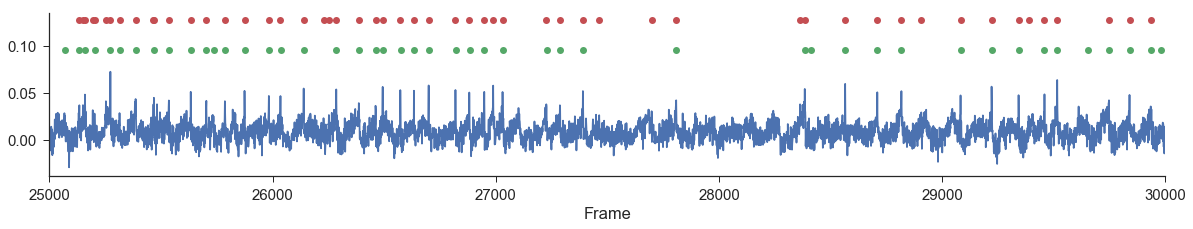

In [50]:
plt.figure(figsize=(20, 3))
plt.plot(voltr_,'-')
plot_spks(plt, spk, voltr.max()*1.5, label='Raw spike time')
plot_spks(plt, spkcount__, voltr.max()*2.0, label='Detected spike time')
plt.xlabel('Frame')
plt.xlim([25000, 30000])
# plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
sns.despine()
plt.show()

In [57]:
# matched = spkcount__[-24001:] == spk[-24001:]
# tot_ = len(spk[-24001:])
range_ = range(len(spkcount__))
matched = spkcount__[range_] == spk[range_]
tot_ = len(spk[range_])
totspk = spk[range_].sum()
totspk_ = spkcount__[range_].sum()

matched_ = (matched).sum()
idx = np.array(np.where(~matched)).flatten()
idx_ = idx[1:] - idx[:-1]
match1_ = (idx_==1).sum()*2
match5_ = np.logical_and(idx_>1, idx_<6).sum()*2

TPspk = 0
winSize = 3
for nspk in np.array(np.where(spk[range_])).flatten():
    if spkcount__[max(0, nspk-winSize):min(nspk+winSize, max(range_))].sum()>0:
        TPspk +=1

# TPspk = (match1_ + match5_)//2 + spk[:36299][matched_].sum()



print('Frac of precise aligned spikes: %d / %d'%(matched_, tot_))
print('Frac of 1 frame-difference spikes: %d / %d'%(match1_, tot_))
print('Frac of <6 frame-difference spikes: %d / %d'%(match5_, tot_))
print('Remaining difference: %d / %d'%(tot_ - matched_ - match1_ - match5_, tot_))
print('Total spikes %d'%(totspk))
print('Found spikes %d'%(TPspk))
print('Unfound spikes %d'%(totspk - TPspk))
print('Extra spikes %d'%(totspk_ - TPspk))

Frac of precise aligned spikes: 132028 / 132895
Frac of 1 frame-difference spikes: 476 / 132895
Frac of <6 frame-difference spikes: 74 / 132895
Remaining difference: 317 / 132895
Total spikes 766
Found spikes 562
Unfound spikes 204
Extra spikes 161


In [76]:
cell_frames = [0, 36299, 36297, 36298, 24001]
cell_frames = np.cumsum(cell_frames)

for ncell in range(4):
    range_ = range(cell_frames[ncell],cell_frames[ncell+1])
    spk_in_range = spk[range_]
    spkc_in_range = spkcount__[range_]
    matched = spk_in_range == spkc_in_range
    tot_ = len(spk_in_range)
    totspk = spk_in_range.sum()
    totspk_ = spkc_in_range.sum()

    matched_ = (matched).sum()
    idx = np.array(np.where(~matched)).flatten()
    idx_ = idx[1:] - idx[:-1]
    match1_ = (idx_==1).sum()*2
    match5_ = np.logical_and(idx_>1, idx_<6).sum()*2

    TPspk = 0
    winSize = 3
    for nspk in np.array(np.where(spk_in_range)).flatten():
        if spkc_in_range[max(0, nspk-winSize):min(nspk+winSize, len(spkc_in_range))].sum()>0:
            TPspk +=1
    print('-------------------')
    print('Result of Cell #%d'%(ncell+1))
    print('Total ephys spikes %d'%(totspk))
    print('Total detected spikes %d'%(totspk_))
    print('Found spikes %d'%(TPspk))
    print('Unfound spikes %d'%(totspk - TPspk))
    print('Extra spikes %d'%(totspk_ - TPspk))
   

-------------------
Result of Cell #1
Total ephys spikes 338
Total detected spikes 423
Found spikes 309
Unfound spikes 29
Extra spikes 114
-------------------
Result of Cell #2
Total ephys spikes 306
Total detected spikes 146
Found spikes 135
Unfound spikes 171
Extra spikes 11
-------------------
Result of Cell #3
Total ephys spikes 76
Total detected spikes 108
Found spikes 72
Unfound spikes 4
Extra spikes 36
-------------------
Result of Cell #4
Total ephys spikes 46
Total detected spikes 46
Found spikes 46
Unfound spikes 0
Extra spikes 0
